In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

**TASK: Open and display the giaraffes.jpg image that is located in the DATA folder.**

In [4]:
from PIL import Image

In [5]:
IMG = Image.open('/content/giraffes.jpg')

In [7]:
type(IMG)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
IMG_arr = np.asarray(IMG)
IMG_arr.shape

(1405, 933, 3)

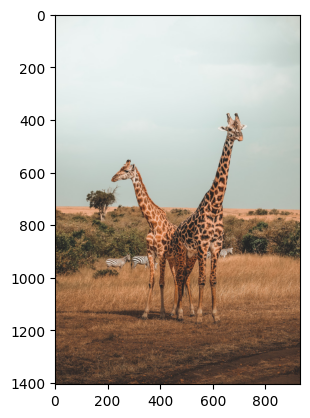

In [9]:
plt.imshow(IMG_arr)

Apply a binary threshold onto the image.

In [10]:
import cv2


In [12]:
# Adding the 0 flag to read it in black and white
img = cv2.imread('/content/giraffes.jpg')

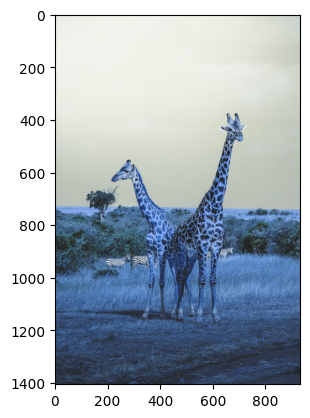

In [13]:
plt.imshow(img,cmap='gray')

In [26]:
img = cv2.imread('/content/giraffes.jpg', cv2.IMREAD_GRAYSCALE)


In [34]:
# Apply binary threshold with a threshold value of 127
threshold_value = 127
_, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)


In [32]:
# Save the resulting binary image
cv2.imwrite('/content/giraffes.jpg', binary_img)

True

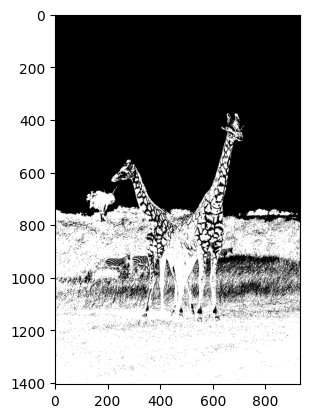

In [39]:

plt.imshow(binary_img, cmap='binary')
plt.show()

**TASK: Open the giaraffes.jpg file from the DATA folder and convert its colorspace to  HSV and display the image.**

In [35]:
img = cv2.imread('/content/giraffes.jpg')


In [36]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


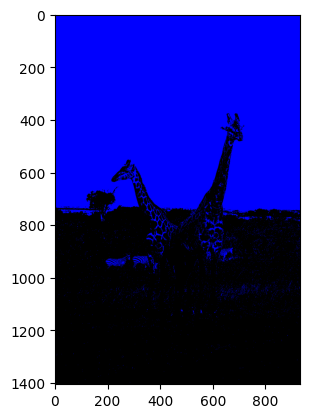

In [42]:
# Plot the HSV image with manual intensity range
plt.imshow(hsv_img, vmin=0, vmax=255)
plt.show()

Create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the giraffer image (displayed in normal RGB)

In [43]:
# Load the giraffe image in RGB format
img = cv2.imread('/content/giraffes.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [44]:
# Define the 4x4 kernel for low pass filter
kernel_size = 4
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)


In [45]:
# Apply the kernel using 2-D convolution
blurred_img = cv2.filter2D(img, -1, kernel)


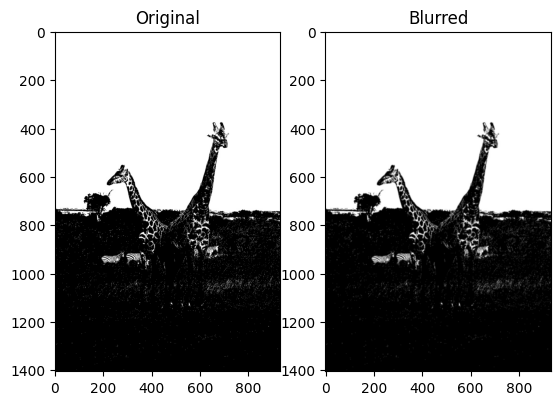

In [58]:
# Display the original and blurred images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(blurred_img)
ax2.set_title('Blurred')

plt.show()

**TASK: Create a Horizontal Sobel Filter (sobelx from our lecture) with a kernel size of 5 to the grayscale version of the giaraffes image and then display the resulting gradient filtered version of the image.**

In [51]:
# Load the giraffe image in grayscale
img = cv2.imread('/content/giraffes.jpg', cv2.IMREAD_GRAYSCALE)


In [52]:
# Define the horizontal Sobel filter
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)


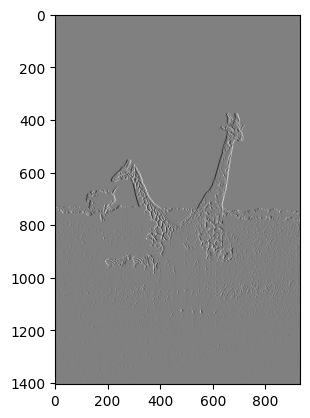

In [53]:
# Display the filtered image
plt.imshow(sobelx, cmap='gray')
plt.show()

**TASK: Plot the color histograms for the RED, BLUE, and GREEN channel of the giaraffe image. Pay careful attention to the ordering of the channels.**

In [55]:
# Load the giraffe image
img = cv2.imread('/content/giraffes.jpg')

In [56]:
# Split the image into its color channels
b, g, r = cv2.split(img)


In [63]:
# Set the histogram parameters
hist_size = 256
hist_range = (0, 256)


In [64]:
# Compute the histograms for each color channel
r_hist = cv2.calcHist([r], [0], None, [hist_size], hist_range)
g_hist = cv2.calcHist([g], [0], None, [hist_size], hist_range)
b_hist = cv2.calcHist([b], [0], None, [hist_size], hist_range)

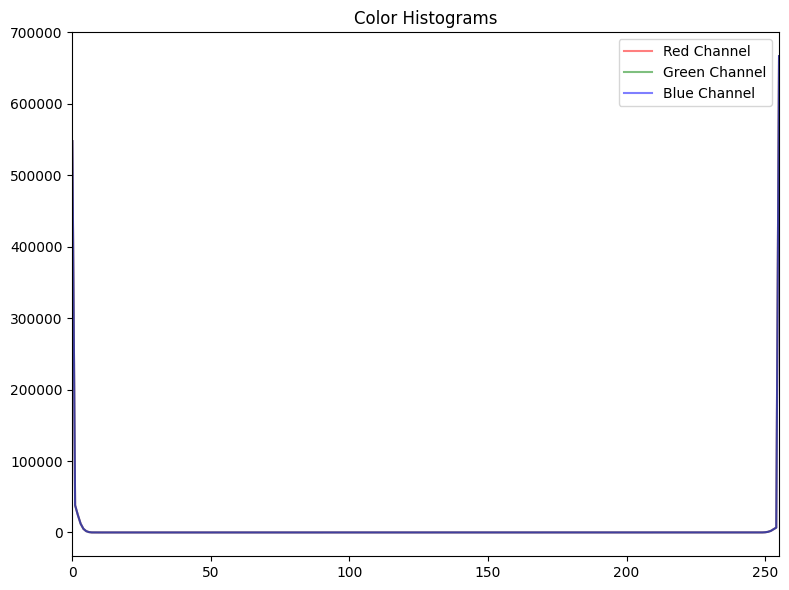

In [72]:
# Plot the color histograms
plt.figure(figsize=(8, 6))
plt.plot(r_hist, color='red', alpha=0.5, label='Red Channel')
plt.plot(g_hist, color='green', alpha=0.5, label='Green Channel')
plt.plot(b_hist, color='blue', alpha=0.5, label='Blue Channel')
plt.xlim([0, hist_size-1])
plt.legend()
plt.title('Color Histograms')

plt.tight_layout()
plt.show()